# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.
### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on
- test.csv file.
- The “Data file.csv” and “Data description.txt” are enclosed with this file.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
# Importing Dataset
data = pd.read_csv('E://train.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
data.shape

(1168, 81)

### Checking Null Values

In [7]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

- We can see, there are null values present in LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, and MiscFeature.

<AxesSubplot:>

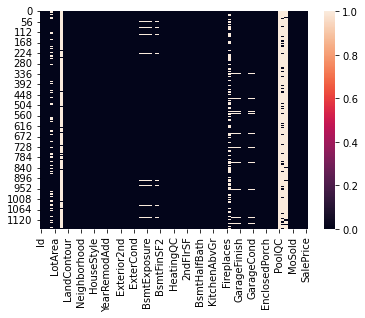

In [8]:
#visualising null values in train dataset
sns.heatmap(data.isnull())

- We can see, Alley, PoolQC, Fence and MiscFeature are having more 90% null values so I will drop this columns.
- In FireplaceQu feature are having more than 55% of missing data so i will drop this features.
- Droping ID columns it simply having ordinal or categorical data.

In [9]:
data.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence','Id'],inplace=True)

In [10]:
data.shape

(1168, 75)

In [13]:
#Identifying the Categorical Columns

data.dtypes[data.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [14]:
#Identifying the non-object or continuous data type Columns

data.dtypes[data.dtypes != 'object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Filling Null Values

In [15]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].mean())

data['MasVnrArea']= data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

data['GarageYrBlt']= data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())


In [16]:
null_columns =['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True)

In [17]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Dataset Description

In [18]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.198559,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.193841,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Big difference between max value and 75% in SalePrice, MSSubClass, LotFrontage, LotArea, BsmtFinSF1, BsmtFinSF2, etc indicates presence of outliers.

- Higher std than mean in columns: MasVnrArea, BsmtFinSF1, BsmtFinSF2, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch etc indicates presence of skewness.

## Univariate Analysis

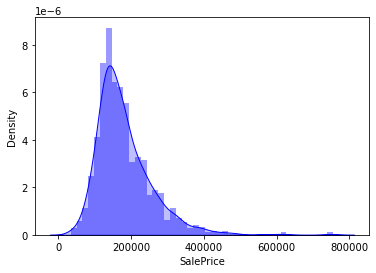

In [19]:
# Distribution plot for the column SalePrice
sns.distplot(data["SalePrice"],color="b",kde_kws={"shade": True},)
plt.show()


- SalePrice is not normally distributed. It contain some outliers.
- SalePrice Are positively or right skewd.

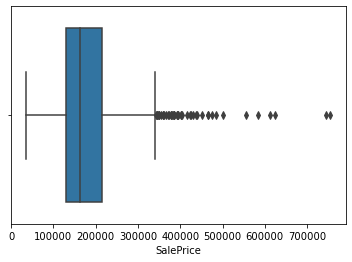

In [20]:
sns.boxplot(data.SalePrice)
plt.show()

- We can see, SalePrice contain Some Outliers.

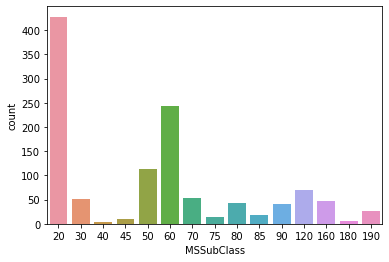

In [21]:
sns.countplot(x='MSSubClass',data=data)
plt.show()

- It is dwelling involved while Selling the Houses.
- We can see, 1-STORY 1946 & NEWER ALL STYLES i.e. 20 has maximum  count followed by 2-STORY 1946 & NEWER i.e. 60.
- 40 and 180 has very few count than others.

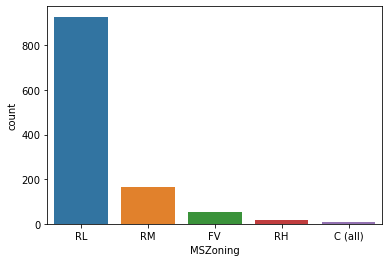

In [22]:
sns.countplot(x='MSZoning',data=data)
plt.show()

- We can see, residual with low density has maximum zone where houses are more number for selling followed by residual medium density.
- Very few houses are for sale in commercial zone.

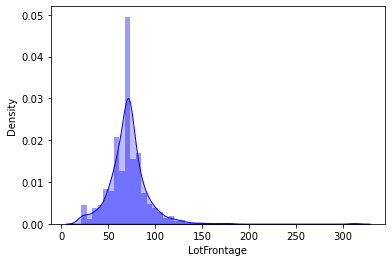

In [23]:
# Distribution plot for the column LotFrontage
sns.distplot(data["LotFrontage"],color="b",kde_kws={"shade": True},)
plt.show()


- LotFrontage means Linear feet of street connected to property. It is a right skewed columns.
- It may have some outliers.
- We can see, Maximum LotFrontage are in 30 to 110. 

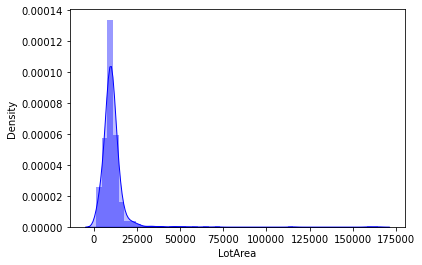

In [24]:
# Distribution plot for the column 
sns.distplot(data["LotArea"],color="b",kde_kws={"shade": True},)
plt.show()


- Lot size in square feet are maximum lies in the range of 0 to 25000.
- LotArea is right skewed.

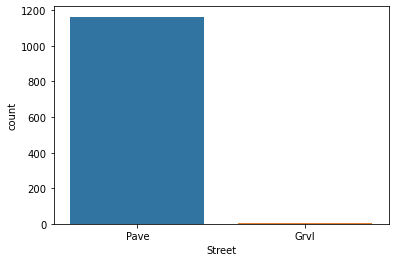

In [25]:
sns.countplot(x='Street',data=data)
plt.show()

- We can see, Pave has maximum access of property and  Gravel almost 1. It has lowest access to property.

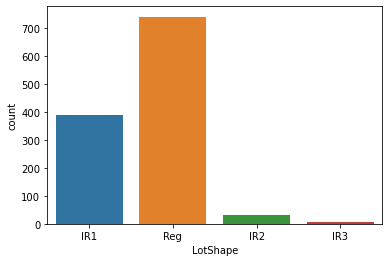

In [26]:
sns.countplot(x='LotShape',data=data)
plt.show()

- Regular Shape of property contains maximum count followed by Slightly irregular.
- Irregular shape of property contais lowest count followed by Moderately Irregular.

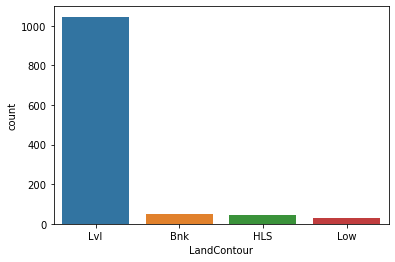

In [27]:
sns.countplot(x='LandContour',data=data)
plt.show()

- Most Properties have Near Flat/Level LandContour.
- Remaining contain almost same count of landcontour.

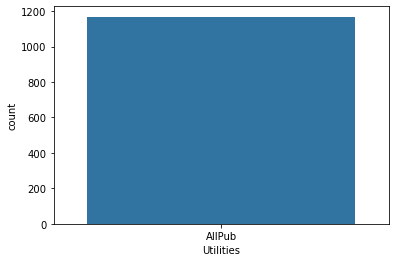

In [28]:
sns.countplot(x='Utilities',data=data)
plt.show()

- Here only one types of utiliers are availabels. i.e. all pub. 
- All public Utilities are available

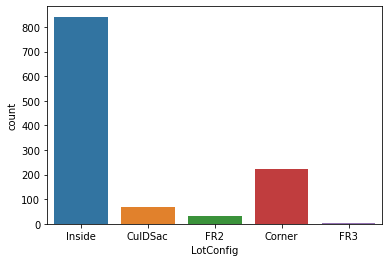

In [29]:
sns.countplot(x='LotConfig',data=data)
plt.show()

- Inside lot is the most common Lot configuration and it has maximum count than others.
- Frontage on 3 sides of property has lowest count. It means it rarely used configuration.

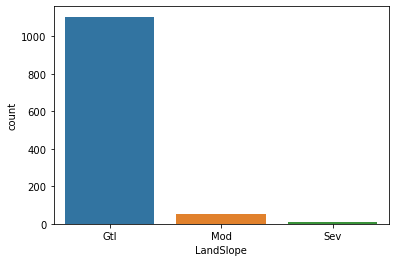

In [30]:
sns.countplot(x='LandSlope',data=data)
plt.show()

- We can see, Gentle slope is most commonly slope of property.
- Severe Slope has lowest count and it not used commonly.

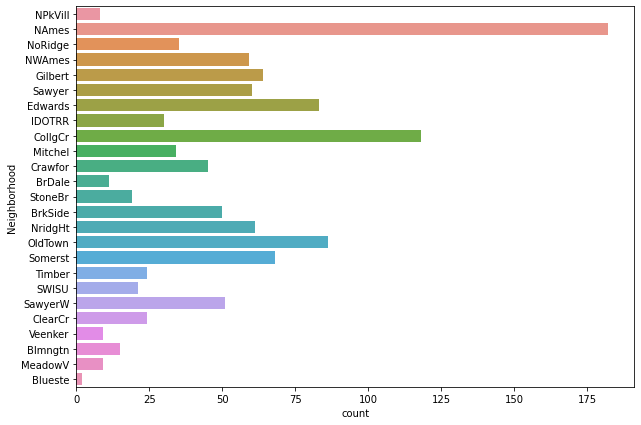

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(y='Neighborhood',data=data)
plt.show()

- Most Housing properties are situated in Neighborhoods of North Ames, followed by College Creek,Edwards and Old Town.
- Very Few houses in neighbhourhood of Bluestem. 

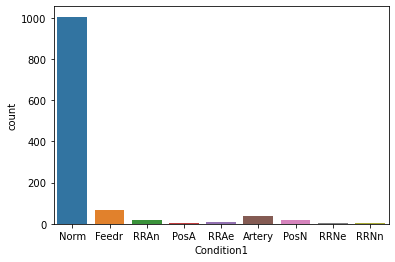

In [32]:
sns.countplot(x='Condition1',data=data)
plt.show()

- Most Housing properties are in proximity to Normal conditions
- Very few properties are in proximity to Within 200' of North-South Railroad

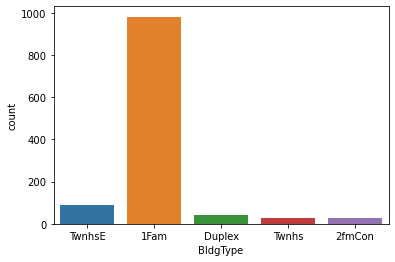

In [33]:
sns.countplot(x='BldgType',data=data)
plt.show()

- Single-family Detached type of family dwelling are most common properties than others.
- Townhouse End Unit type of family dwelling are very fewproperties than others.

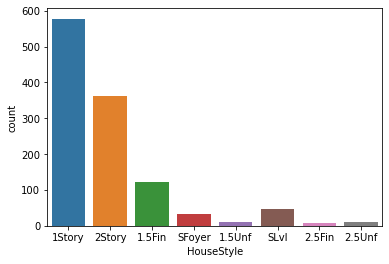

In [34]:
sns.countplot(x='HouseStyle',data=data)
plt.show()

- Most Housing properties 1 storied and 2 storied.
- There are less housing properties wo and one-half story: 2nd level finished.

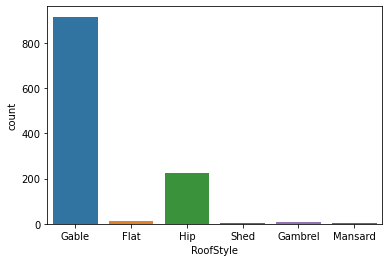

In [35]:
sns.countplot(x='RoofStyle',data=data)
plt.show()

- Most Houses have Gable roof style
- Shed, Gambrel and Mansard has very low count.

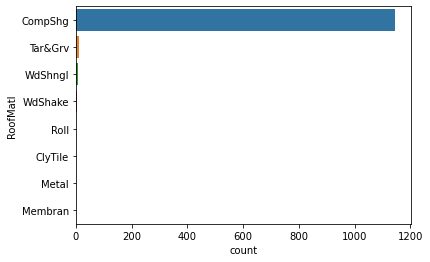

In [36]:
sns.countplot(y='RoofMatl',data=data)
plt.show()

- Most Houses have roofs made of Standard (Composite) Shingle.
- Almost remaining all are having lowest count than CompShg.

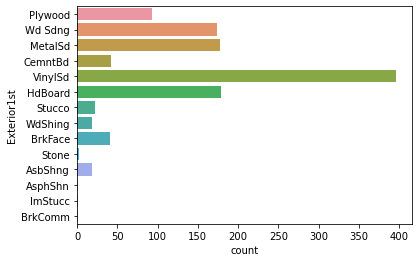

In [37]:
sns.countplot(y='Exterior1st',data=data)
plt.show()

- Vinyl Siding is the most common exterior covering used followed by HDBoard.
- Asphalt Shingles has lowest count of exterior are used.

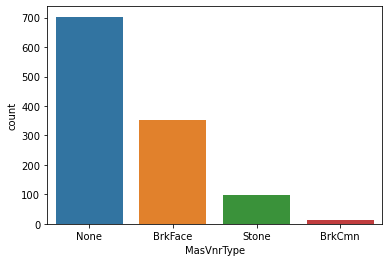

In [38]:
sns.countplot(x='MasVnrType',data=data)
plt.show()

- Most Houses don't have a Masonry veneer type.
- while some have Brick Face Masonry veneer type.

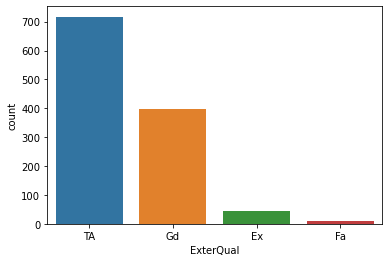

In [39]:
sns.countplot(x='ExterQual',data=data)
plt.show()

- The quality of the material on the exterior is most commonly average/typical.
- The quality of material on exterior is very few are fair.

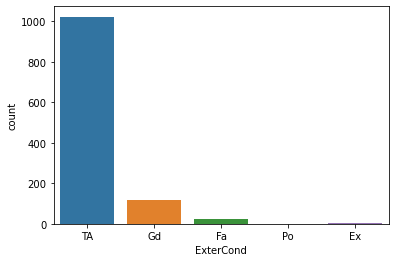

In [40]:
sns.countplot(x='ExterCond',data=data)
plt.show()

- The present condition of the material on the exterior is most commonly average/typical

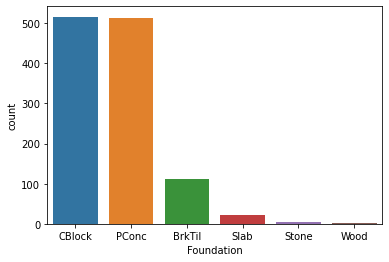

In [41]:
sns.countplot(x='Foundation',data=data)
plt.show()

- Two of the most common foundation types are Cinder Block and Poured Contrete.
- Very few are used Wood type for foundation.

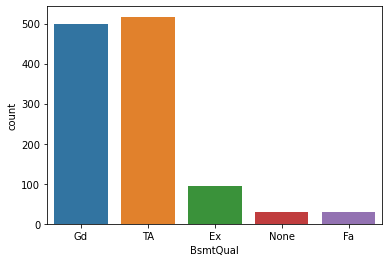

In [42]:
sns.countplot(x='BsmtQual',data=data)
plt.show()

- The height of the basement is usually either Typical (80-89 inches) or Good (90-99 inches)

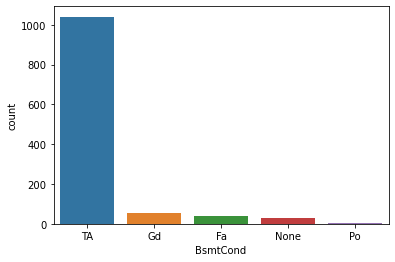

In [43]:
sns.countplot(x='BsmtCond',data=data)
plt.show()

- The general condition of the basement is commonly Typical with slight dampness.
- Some of Basement have very Poor condition.

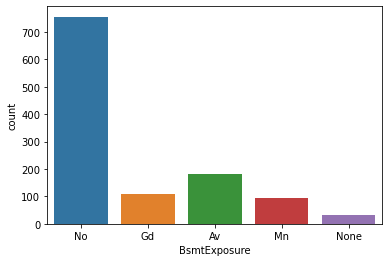

In [44]:
sns.countplot(x='BsmtExposure',data=data)
plt.show()

- Basements most commonly have no exposure.
- But Some Basement has Average Exposure.

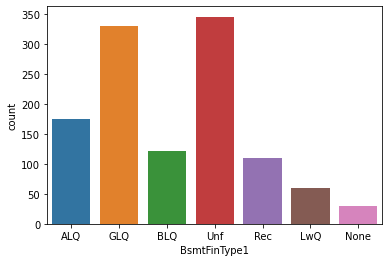

In [45]:
sns.countplot(x='BsmtFinType1',data=data)
plt.show()

- Most houses have Basements that are usually unfinished followed by houses with basements having Good Living Quarters

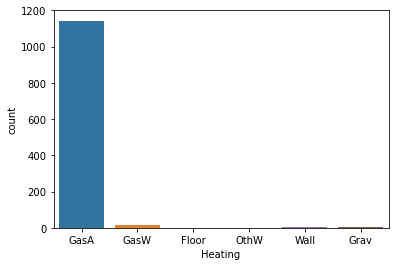

In [46]:
sns.countplot(x='Heating',data=data)
plt.show()

- Most or almost all houses have Gas forced warm air furnace heating arrangement.

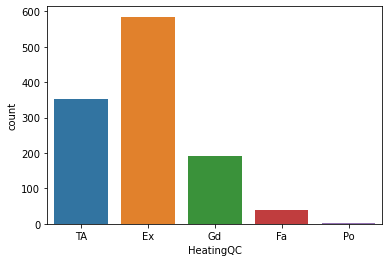

In [47]:
sns.countplot(x='HeatingQC',data=data)
plt.show()

- Most houses have Excellent Heating quality and condition followed by Average/Typical.
- Very low almost dont have poor quality of Heating condition of houses.

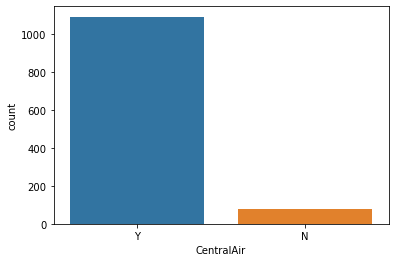

In [48]:
sns.countplot(x='CentralAir',data=data)
plt.show()

- Most houses have Central air conditioning.
- Very few houses dont have central air conditioning.

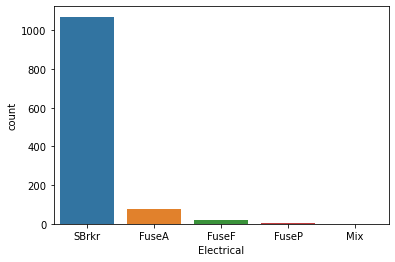

In [49]:
sns.countplot(x='Electrical',data=data)
plt.show()

- Most or almost all houses have Standard Circuit Breakers & Romex Electrical system.

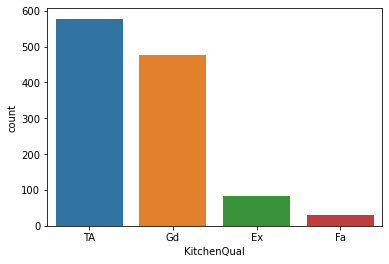

In [50]:
sns.countplot(x='KitchenQual',data=data)
plt.show()

- Most houses have Most houses have Typical/Average and Good Kitchen quality.
- Very fwe have fair quality of kitchen.

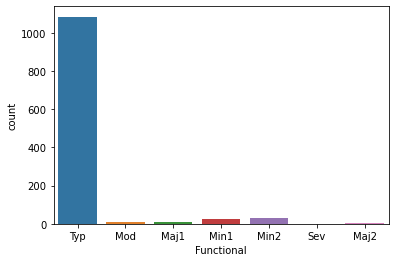

In [51]:
sns.countplot(x='Functional',data=data)
plt.show()

- Most houses have Typical Functionality.

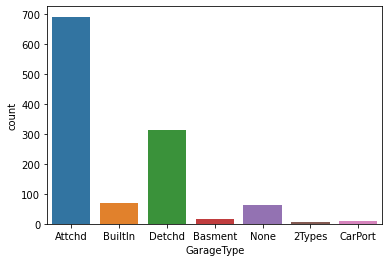

In [52]:
sns.countplot(x='GarageType',data=data)
plt.show()

- Most houses have a Garage Attached to home.
- Many houses have a Detached from home.

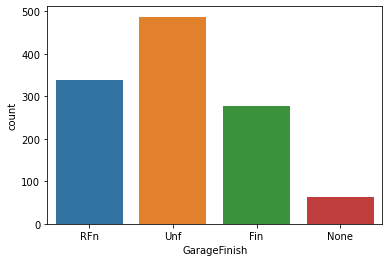

In [53]:
sns.countplot(x='GarageFinish',data=data)
plt.show()

- Most houses have an Unfinished garage.
- But so many houses have a Rough Finished garage.

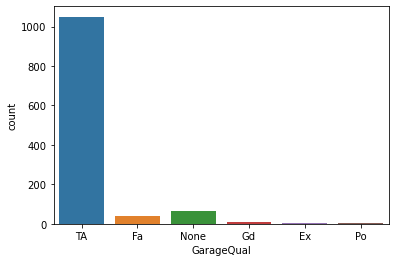

In [54]:
sns.countplot(x='GarageQual',data=data)
plt.show()

- Almost all Garage is usually Typical/Average.

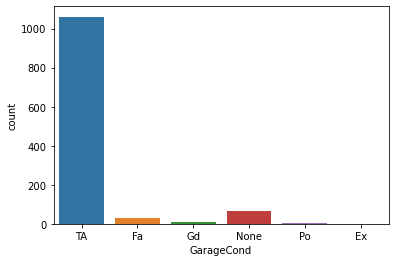

In [55]:
sns.countplot(x='GarageCond',data=data)
plt.show()

- Garage condition is usually Typical/Average

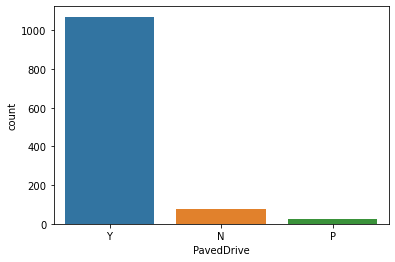

In [56]:
sns.countplot(x='PavedDrive',data=data)
plt.show()

- Most houses have a Paved driveway.
- Very few have a Dirt/Gravel.

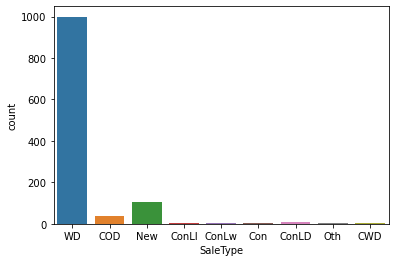

In [57]:
sns.countplot(x='SaleType',data=data)
plt.show()

- Almost all are having Warranty Deed - Conventional is the most common Type of sale.

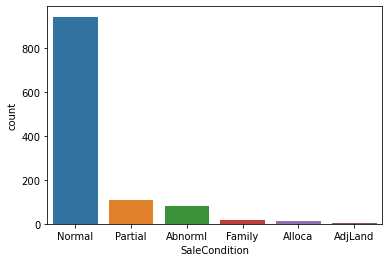

In [58]:
sns.countplot(x='SaleCondition',data=data)
plt.show()

- Almost all are having Condition of sale is Normal Sale.

## Bivariate Analysis

<AxesSubplot:xlabel='YrSold'>

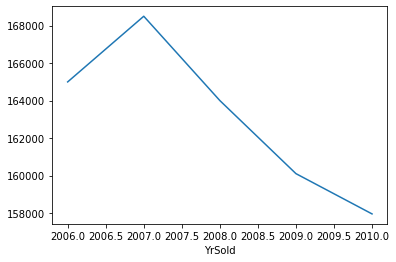

In [59]:
data.groupby('YrSold').median()['SalePrice'].plot()

- We can see, In 2007 housing sales price is in peak. But after 2007 Hoses price is drastically dropped.

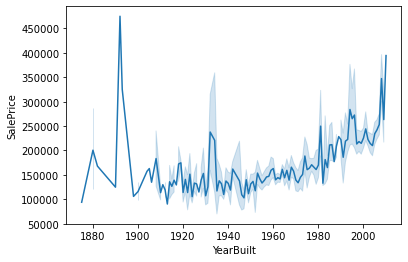

In [60]:
sns.lineplot(x='YearBuilt',y='SalePrice',data=data)
plt.show()

- We can see, houses price are increases after the year of built 1990.
- But in year of 1880 to 1990, sale price of house is high.

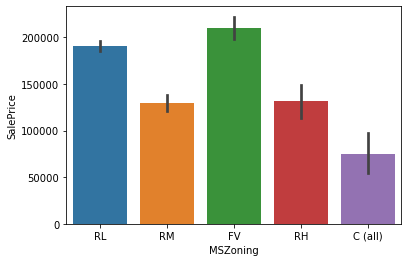

In [61]:
sns.barplot(x='MSZoning',y='SalePrice',data=data)
plt.show()

- Floating Village Residential has maximum salePrice of houses followed by Residential Low Density.
- Commercial houses are having low Sale Price comparitively. 

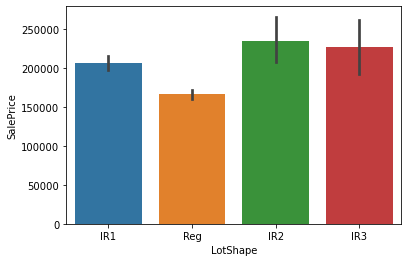

In [62]:
sns.barplot(x='LotShape',y='SalePrice',data=data)
plt.show()

- Moderately Irregular type of shape houses has maximum sale price followed by  Irregular.
- But Regular type of Lotshape has lowe sale price than others.

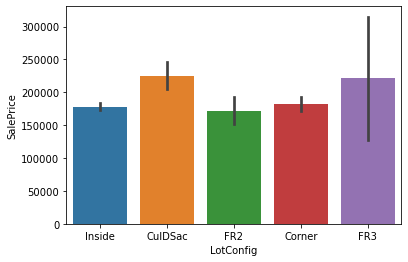

In [63]:
sns.barplot(x='LotConfig',y='SalePrice',data=data)
plt.show()

- Cul-de-sac of Lot configuration has highest sale price than others followed by Frontage on 3 sides of property.
- Inside of Lot configuration has lowest sale price than others.

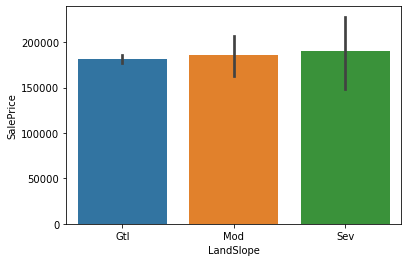

In [64]:
sns.barplot(x='LandSlope',y='SalePrice',data=data)
plt.show()

- Severe Slope has highest sale price than others.
- But all are having almost same sale price so slope is not affecting more to sale price.

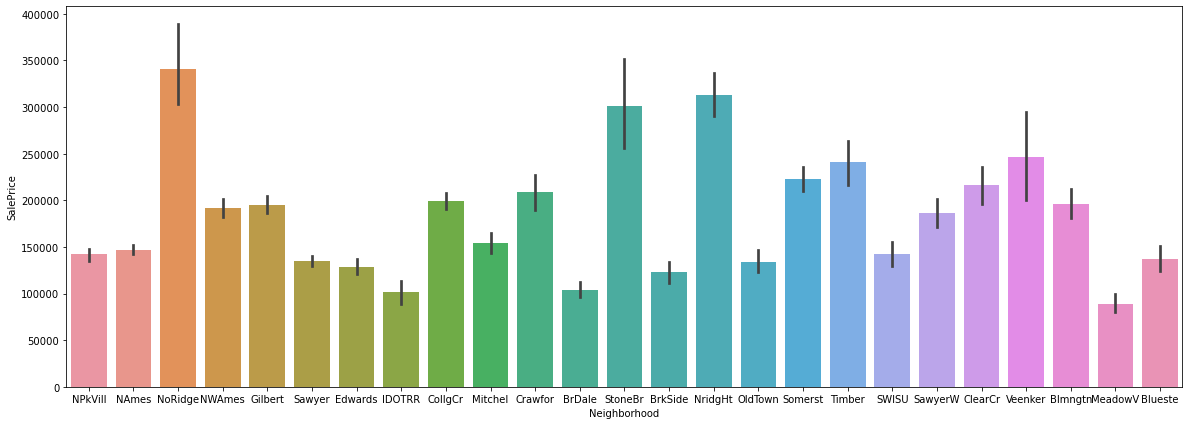

In [65]:
plt.figure(figsize=(20,7))
sns.barplot(x='Neighborhood',y='SalePrice',data=data)
plt.show()

- Northridge has maximum sale price, it means that Northridge neighborhood has maximum sale price of houses followed byNorthridge Heights.
- The houses are Meadow Village neighborhood has lowest sale price of houses than others.

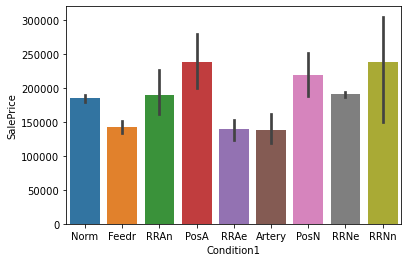

In [66]:
sns.barplot(x='Condition1',y='SalePrice',data=data)
plt.show()

- The houses are proximity to  condition Adjacent to positive off-site feature this has maximum sale price followed by Adjacent to North-South Railroad.
- Hoses have adjacent to arterial street has lowest sale price.

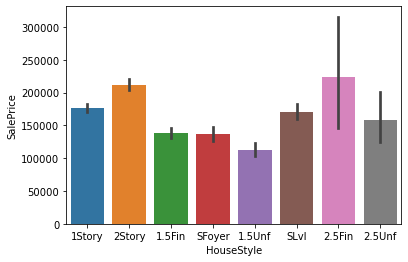

In [67]:
sns.barplot(x='HouseStyle',y='SalePrice',data=data)
plt.show()

- Two and one-half story: 2nd level finished this type of houses dwelling has maximum sale price than others.
- One and one-half story: 2nd level finished it has lowest sale price.

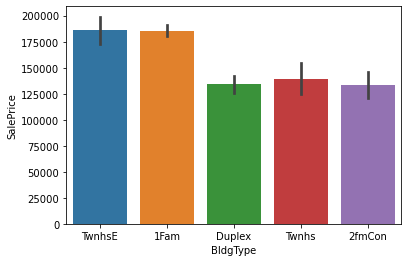

In [68]:
sns.barplot(x='BldgType',y='SalePrice',data=data)
plt.show()

- Townhouse End Unit , tghis type of dwelling has maximum sale price than others followed by ownhouse Inside Unit.
- Duplex has lowest sale than others. 

Text(0.5, 1.0, 'Price Trend')

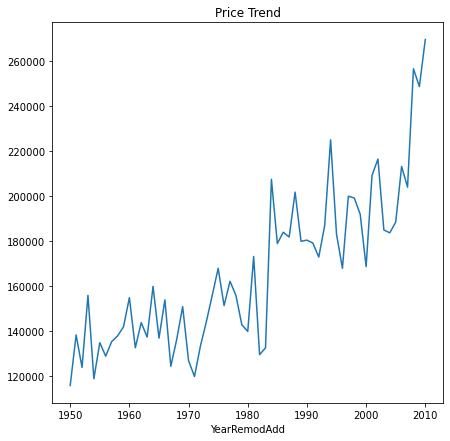

In [69]:
plt.figure(figsize=(7,7))
data.groupby('YearRemodAdd').median()['SalePrice'].plot()
plt.title('Price Trend')

- It is observed that Sales value is higher for houses which were remodelled more recently.

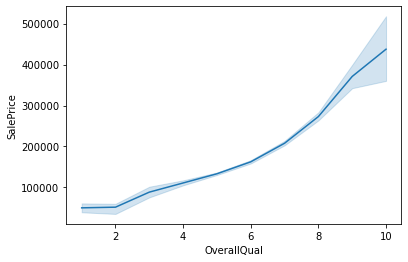

In [70]:
sns.lineplot(x='OverallQual',y='SalePrice',data=data)
plt.show()

- We can see, Overall quality has linear relationship with Sale Price.
- If qualiy of houses are incresing then price of houses are also increasing.

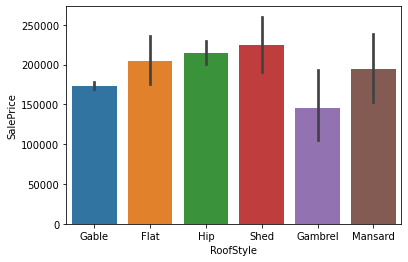

In [71]:
sns.barplot(x='RoofStyle',y='SalePrice',data=data)
plt.show()

- Shed type of roof style of houses has maximum sale price than others followed by Hip type of roof style.
- Gambrel type of roof style of houses has lowest sale price.

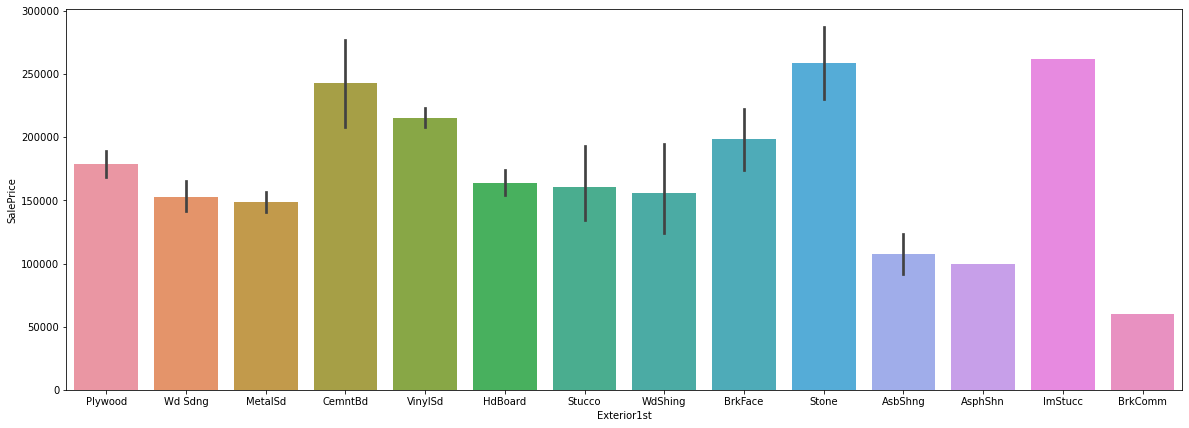

In [72]:
plt.figure(figsize=(20,7))
sns.barplot(x='Exterior1st',y='SalePrice',data=data)
plt.show()

- Imitation Stucco type Exterior covering on house has maximum sale price followed by stone.
- Brick Common type Exterior covering on house has lowest sale price followed by Asphalt Shingles.

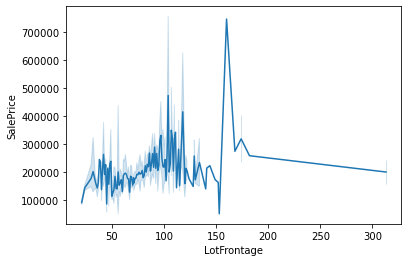

In [73]:
sns.lineplot(x='LotFrontage',y='SalePrice',data=data)
plt.show()

- Houses with LotFrontage between 100 ft and 200 ft are sold for the highest amount.

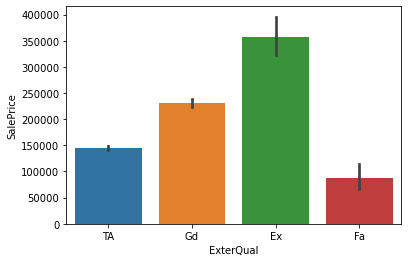

In [74]:
sns.barplot(x='ExterQual',y='SalePrice',data=data)
plt.show()

- Excellent quality of exterior has maximum sale price followed by good quality.
- Fair  quality houses has lowest sale price than others.

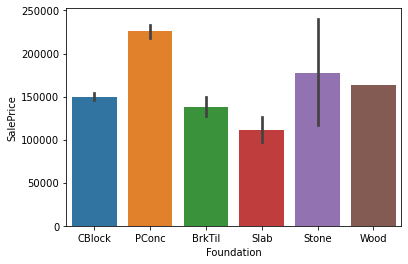

In [75]:
sns.barplot(x='Foundation',y='SalePrice',data=data)
plt.show()

- Poured Contrete type of foundation houses has maximum sale price thna others followed by Stone.
- Slab type of foundation has lowest sale price thna others.

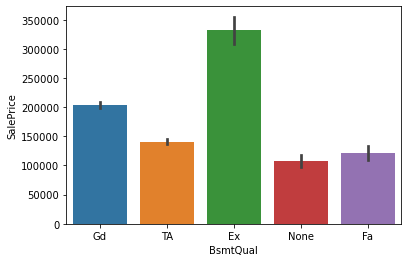

In [76]:
sns.barplot(x='BsmtQual',y='SalePrice',data=data)
plt.show()

- Excellent quality of Basement has more sale price than others followed by good quality of Basement.
- None of type or no Basement houses has lowest sale price than others.

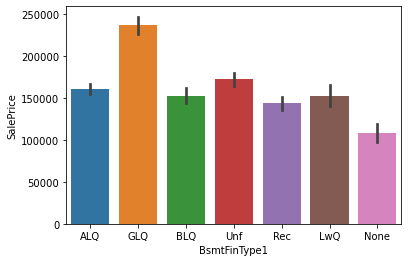

In [77]:
sns.barplot(x='BsmtFinType1',y='SalePrice',data=data)
plt.show()

- Good Living Quarters type of Rating of basement finished area has highest sale price than others followed Unfinished.
- No Basement has lowest sale price.

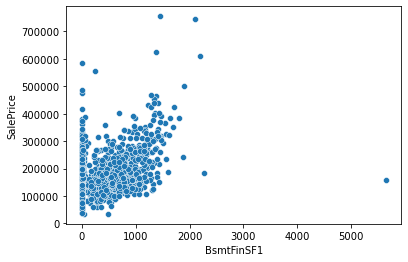

In [78]:
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=data)
plt.show()

- It has linear relationship with each others.
- Maximum sale price of Type 1 finished square feet is lies in 0 to 2000.

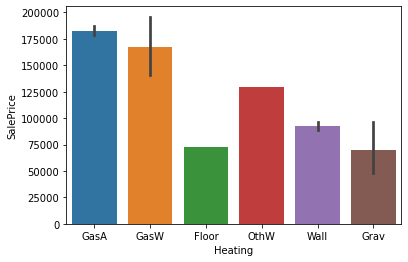

In [79]:
sns.barplot(x='Heating',y='SalePrice',data=data)
plt.show()

- Gas forced warm air furnace of heating houses has more sale price than others followed by Gas hot water or steam heat.
- Floor Furnace used heating has less sale price than others.

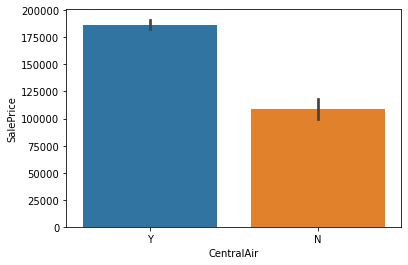

In [80]:
sns.barplot(x='CentralAir',y='SalePrice',data=data)
plt.show()

- Those houses has cetralAir conditioning those house has maximum sale price than others.
- Those houses are not used central air conditioning has mimimum sale price than others.

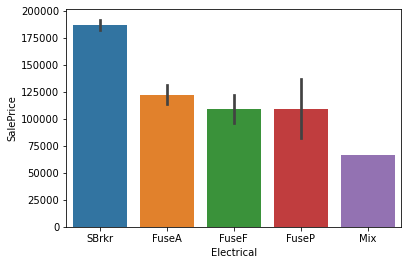

In [81]:
sns.barplot(x='Electrical',y='SalePrice',data=data)
plt.show()

- Standard Circuit Breakers & Romex type electrical system has higher sale price than others.
- Mix type of electrical system has lower sale price than others.

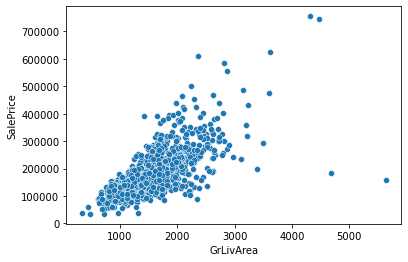

In [82]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=data)
plt.show()

- Above grade (ground) living area square feet has linear relationship with sale price.

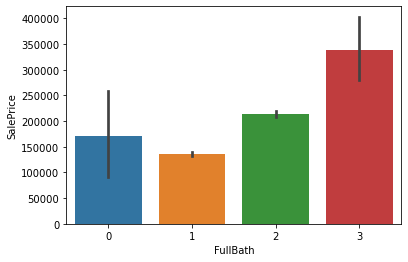

In [83]:
sns.barplot(x='FullBath',y='SalePrice',data=data)
plt.show()

- Type 3 of FullBath has maximum sale price than others.
- type 1 FullBath has lowest sale price than others.

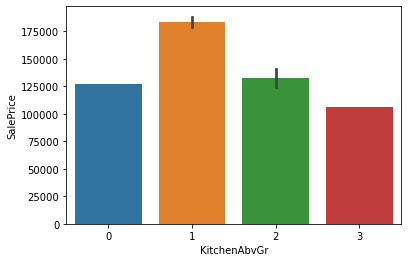

In [84]:
sns.barplot(x='KitchenAbvGr',y='SalePrice',data=data)
plt.show()

- 1 type of kitchen above grade has maximum sale price followed by 2.
- All Kithchen has equaly distributed upto 100000.

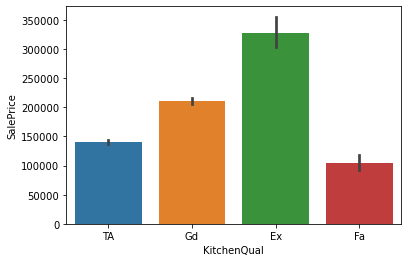

In [85]:
sns.barplot(x='KitchenQual',y='SalePrice',data=data)
plt.show()

- Excellent type quality of Kitchen has maximum sale price followed by good quality of Kitchen.
- Fair quality of Kitchen has lowest sale price than others.

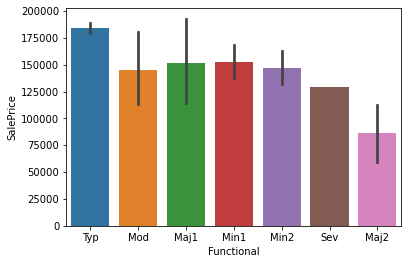

In [86]:
sns.barplot(x='Functional',y='SalePrice',data=data)
plt.show()

- Typical Functionality of garage near to house has maximum sale price than others.
- Major Deductions 2 has lowest sale price.

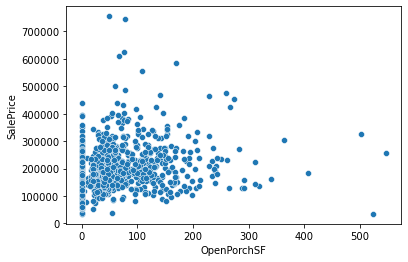

In [87]:
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=data)
plt.show()

- There is no linear relationship between both features.

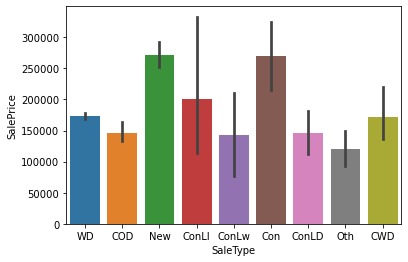

In [88]:
sns.barplot(x='SaleType',y='SalePrice',data=data)
plt.show()

- Contract 15% Down payment regular terms sale type has more sale price than others.
- Others type od sale type has lower sale price.

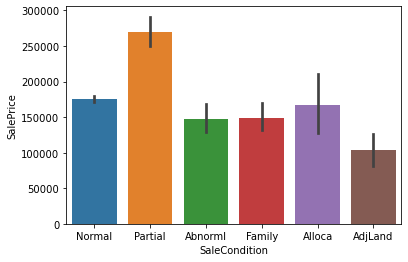

In [89]:
sns.barplot(x='SaleCondition',y='SalePrice',data=data)
plt.show()

- Partial type of sale condition has maximum house sale price than others.
- Adjoining Land Purchase of sale condition house of sale price.

## Multivariate Analysis

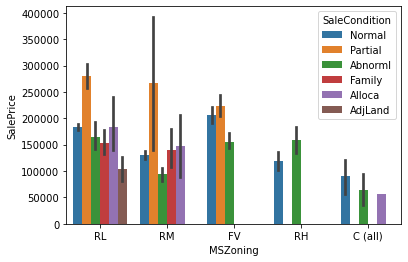

In [90]:
sns.barplot(x='MSZoning' ,y='SalePrice',hue = 'SaleCondition',data=data)
plt.show()

- New Homes are the most popular in all types of zoning.
- Partial sale type of condition has highest sale price.

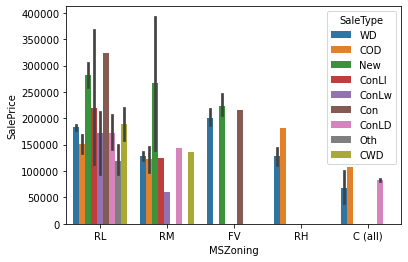

In [91]:
sns.barplot(x='MSZoning' ,y='SalePrice',hue = 'SaleType',data=data)
plt.show()

- Low interest contract are the most popular sale types in low density.
- New Houses are top among other sale type and it has good sale price.

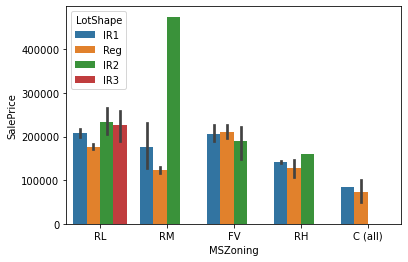

In [92]:
sns.barplot(x='MSZoning' ,y='SalePrice',hue = 'LotShape',data=data)
plt.show()

- Partially irregular and irregular plot shapes are most popular in low and medium residential zones.

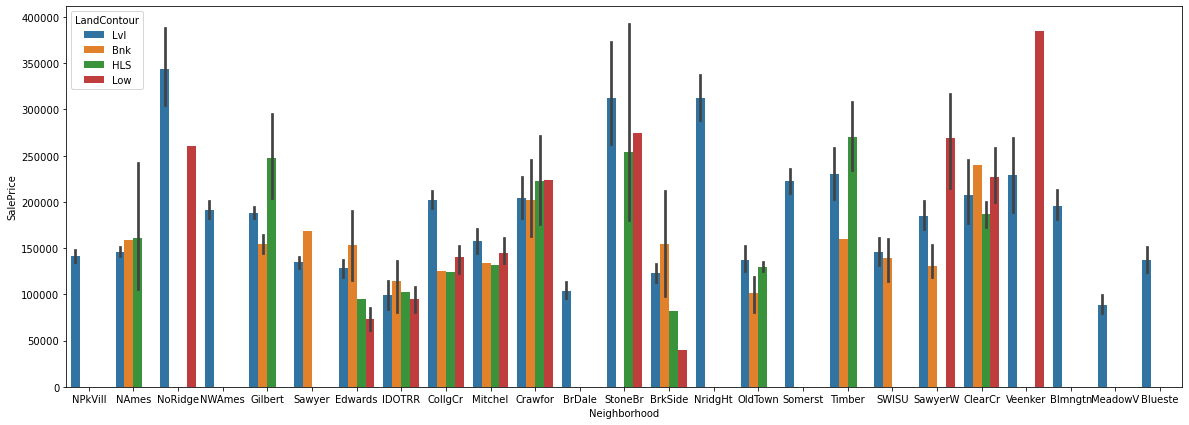

In [93]:
plt.figure(figsize=(20,7),)
sns.barplot(x='Neighborhood',y='SalePrice',hue ='LandContour',data=data)
plt.show()

- Most housing properties established in levelled regions in North Ridge sell for the highest.
- Most Housing properties in levelled regions of Stone Brook sell for highest followed by banked region and hillsides.
- Houses in levelled region of NorthRidge heights sell for the most while housing properties in depressed regions of Veenker sell for the highest prices.

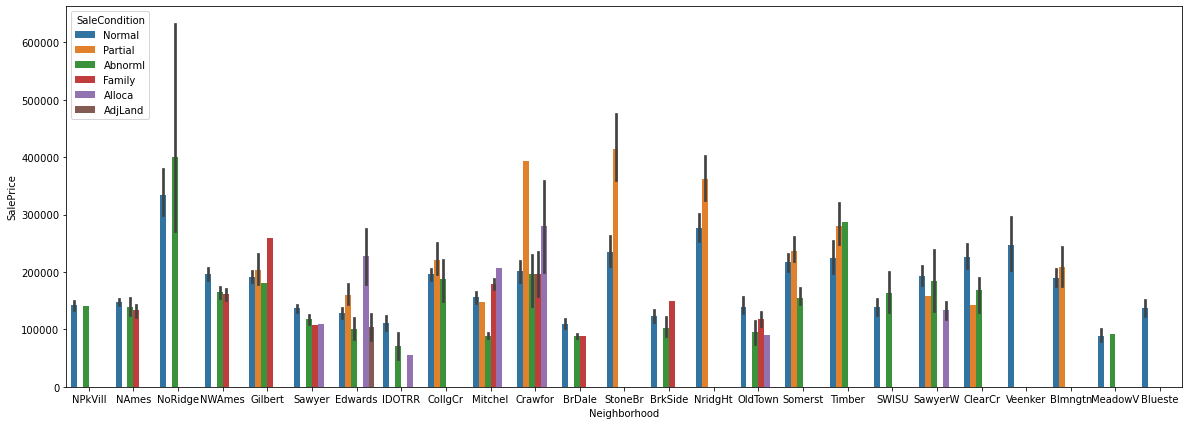

In [94]:
plt.figure(figsize=(20,7))
sns.barplot(x='Neighborhood',y='SalePrice',hue = 'SaleCondition',data=data)
plt.show()

- Most housing properties that are newly established in Crawford,Stone Brook, Timberlane,North Ridge Heights,Bloomington Heights sell for the highest.
- Most Housing properties in North Ridge sell for trade, foreclosure, short sale and normal sale in North Ridge.

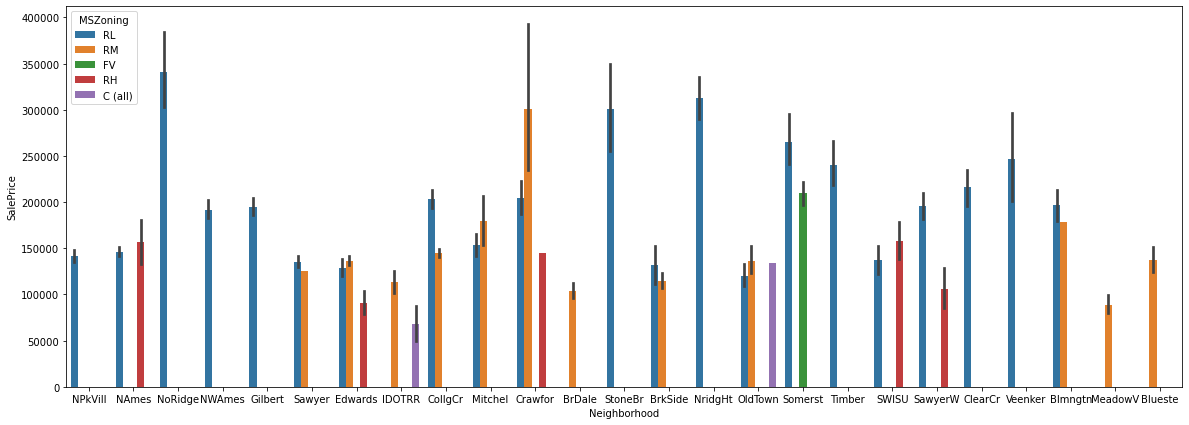

In [95]:
plt.figure(figsize=(20,7))
sns.barplot(x='Neighborhood',y='SalePrice', hue = 'MSZoning', data=data)
plt.show()

- Most houses sold in North Ridge,North Ridge Heights, Somerset,TimberLane,Veenker, Bloomington Heights are in low density residential zones.
- North Ames has more houses sold in High density residential zones, while Crawford has more houses sold in medium density residential zones.

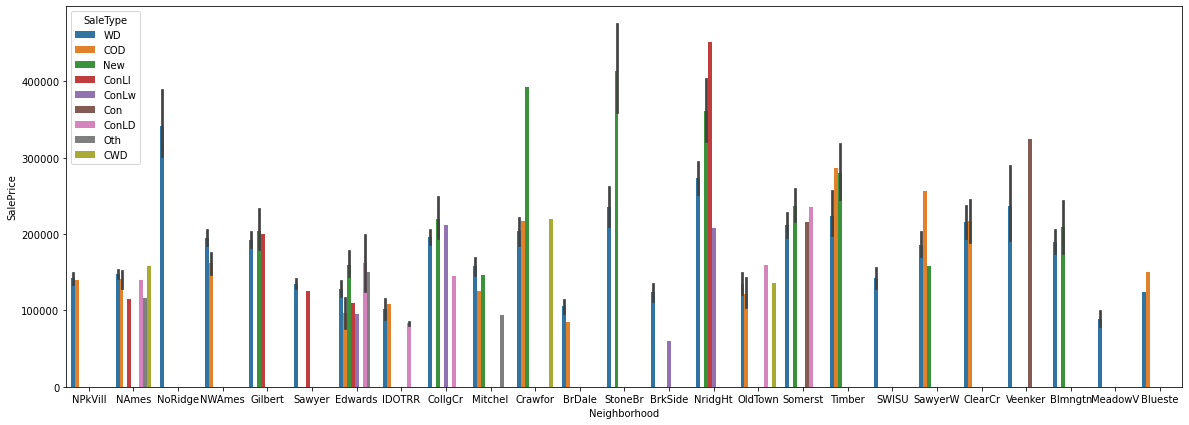

In [96]:
plt.figure(figsize=(20,7))
sns.barplot(x='Neighborhood',y='SalePrice', hue = 'SaleType', data=data)
plt.show()

- Warranty Deed - Conventional, Home just constructed and sold, Contract Low InterestCourt Officer Deed/Estate are the most common sale types.

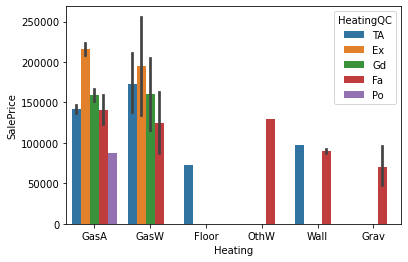

In [97]:
sns.barplot(x='Heating',y='SalePrice',hue ='HeatingQC',data=data)
plt.show()

- Excelent quality of Gas forced warm air furnace and Gas hot water heating systems fetches the highest amount of money.

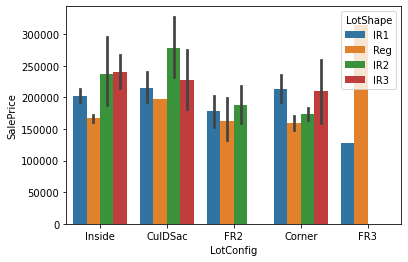

In [98]:
sns.barplot(x='LotConfig',y='SalePrice',hue = 'LotShape',data=data)
plt.show()

- 3 sided Frontage properties with Regular plot shape sell for the highest.

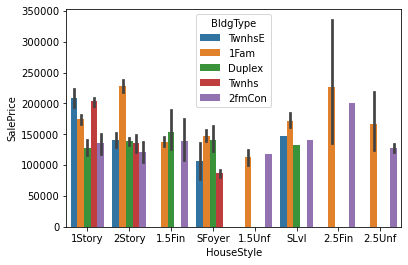

In [99]:
sns.barplot(x='HouseStyle',y='SalePrice',hue = 'BldgType',data=data)
plt.show()

- Two and one-half story: 2nd level finished housing properties sell for the highest.

In [100]:
data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000


## Encoding Categorical Columns

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()

In [103]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

### Correlation of the features with target column

In [104]:
data.corr()['SalePrice'].sort_values()

ExterQual       -0.624820
BsmtQual        -0.601307
KitchenQual     -0.592468
GarageFinish    -0.424922
GarageType      -0.415370
HeatingQC       -0.406604
BsmtExposure    -0.282480
LotShape        -0.248171
MSZoning        -0.133221
KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
Heating         -0.100021
BsmtFinType1    -0.099860
BldgType        -0.066028
OverallCond     -0.065642
MSSubClass      -0.060775
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
LowQualFinSF    -0.032381
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
MasVnrType       0.007732
LandSlope        0.015485
LandContour      0.032836
Condition2       0.033956
Street           0.044753
3SsnPorch        0.060119
BsmtFinType2     0.069657
MoSold           0.072764
BsmtCond         0.084121
Exterior2nd      0.097541
ScreenPorch      0.100284
PoolArea         0.103280
Condition1       0.105820
Exterior1st      0.108451
ExterCond        0.115167
Functional  

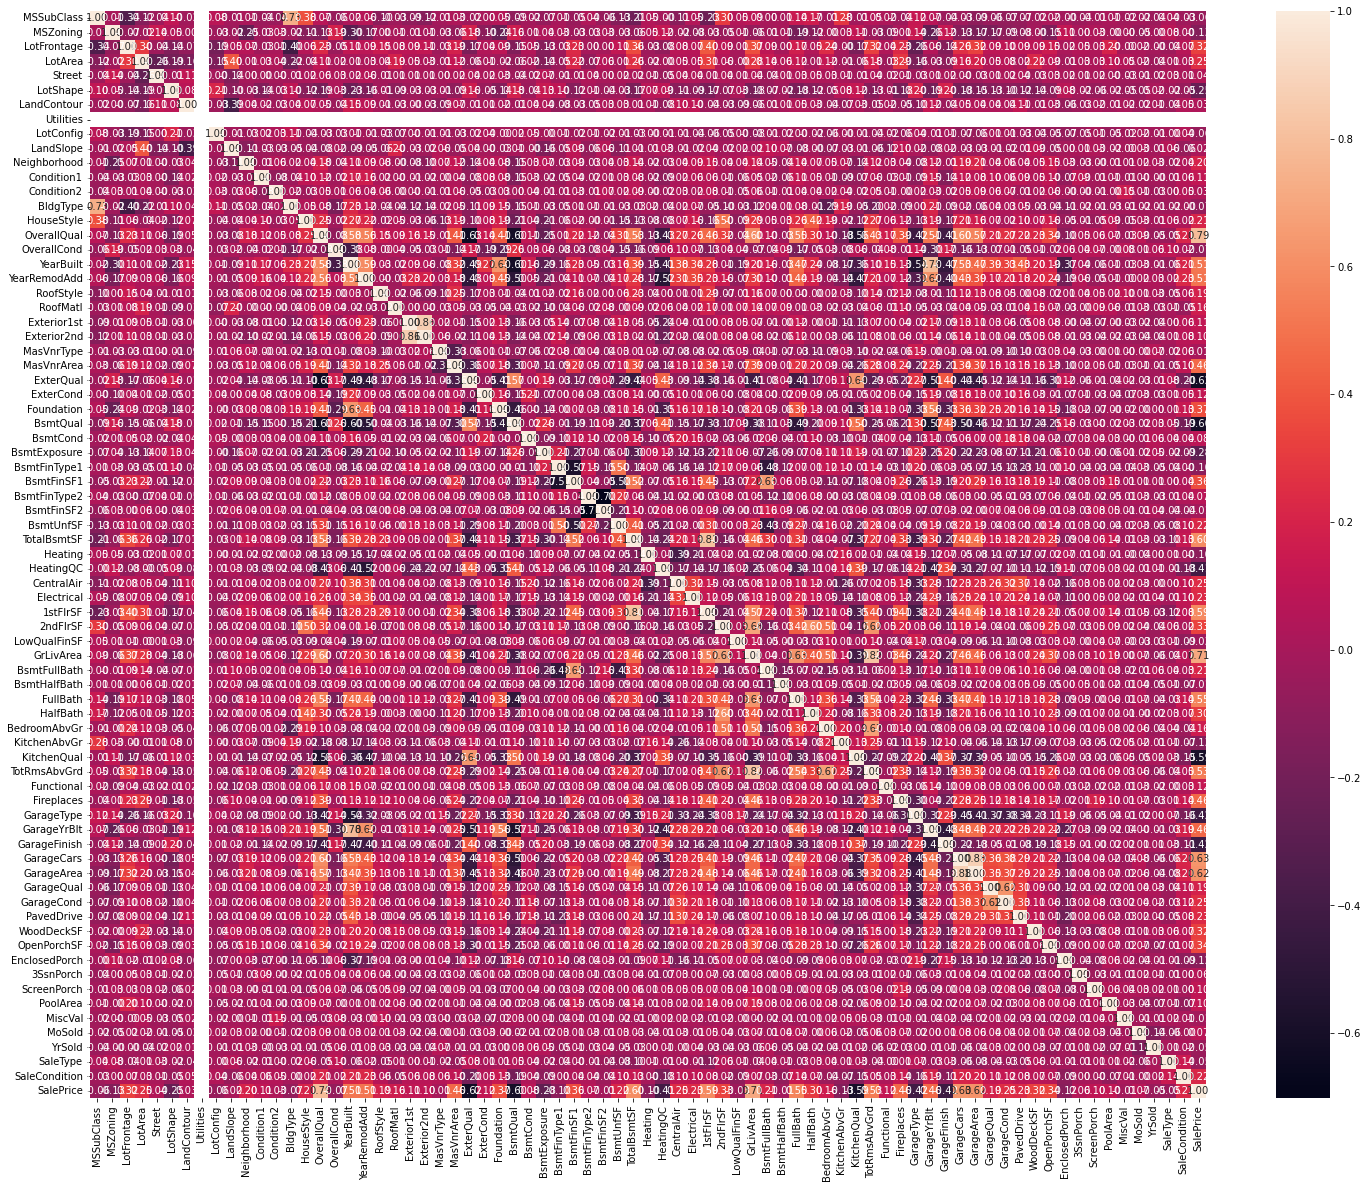

In [105]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

## Visualizing correlation of feature columns with label column.

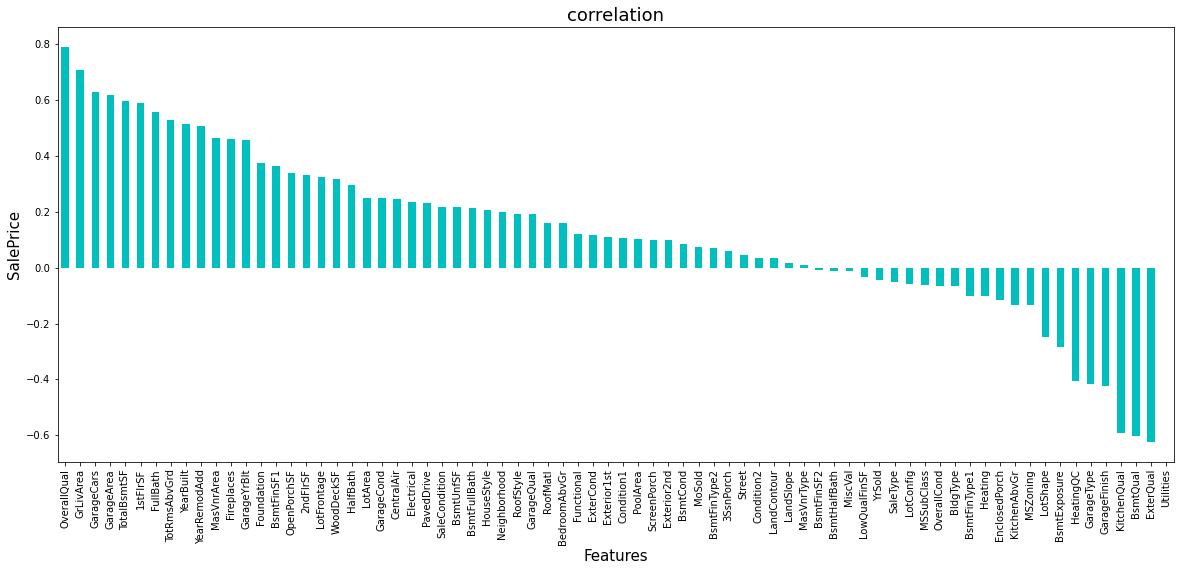

In [106]:
plt.figure(figsize = (20,8))
data.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('SalePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- OverallQual,GrLiveArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,FirePlaces have the strongest positive correlation with SalePrice.
- While BsmtQual,ExterQual,KitchenQual,GarageFinish,House_age,Remod_age,HeatingQC,Garage_age have the strongest negative correlation with SalePrice.

## Checking Outliers

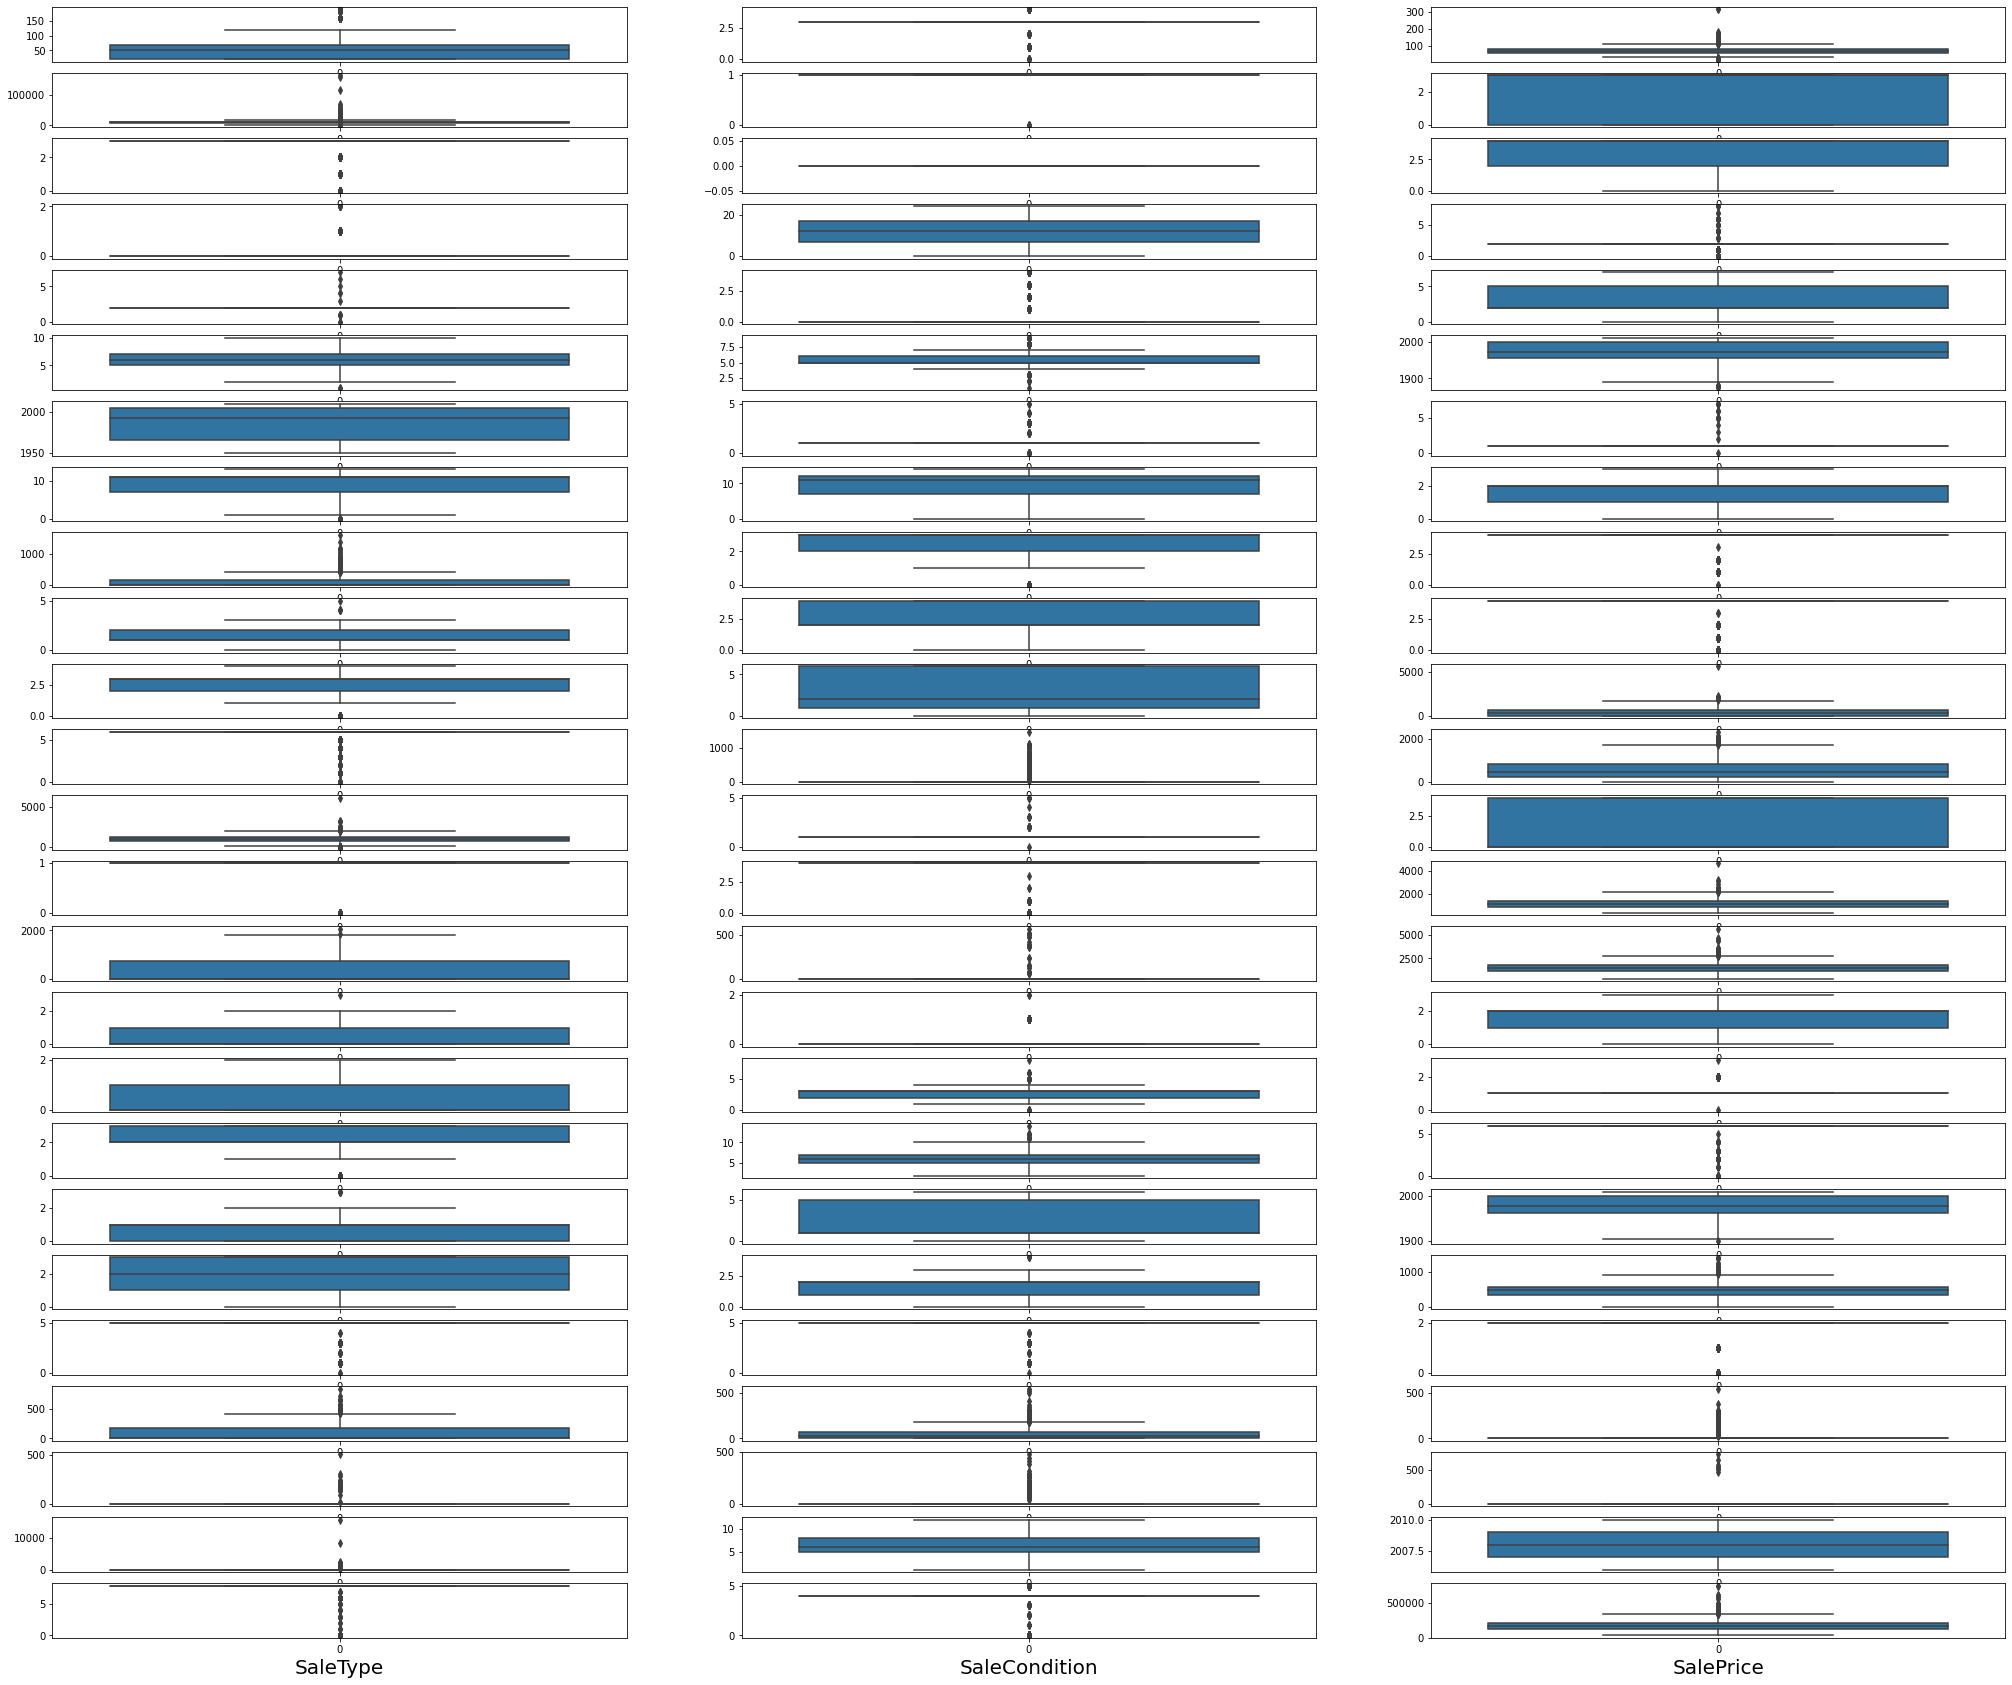

In [107]:
plt.figure(figsize=(35,30))
plotnumber = 1

for column in data:
    if plotnumber <=75:
        plt.subplot(25,3,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see almost all features are having outliers.

### Removing Outliers

In [108]:
df2 =data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF']]

In [109]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [110]:
df.shape

(1053, 12)

### Percentage of data loss

In [111]:
data.shape

(1168, 75)

In [112]:
data_loss = ((1168 - 1053)/1168*100)
print(data_loss,'%')

9.845890410958905 %


- data loss is not acceptable therefore outliers will not be removed.

## Checking Distribution of data

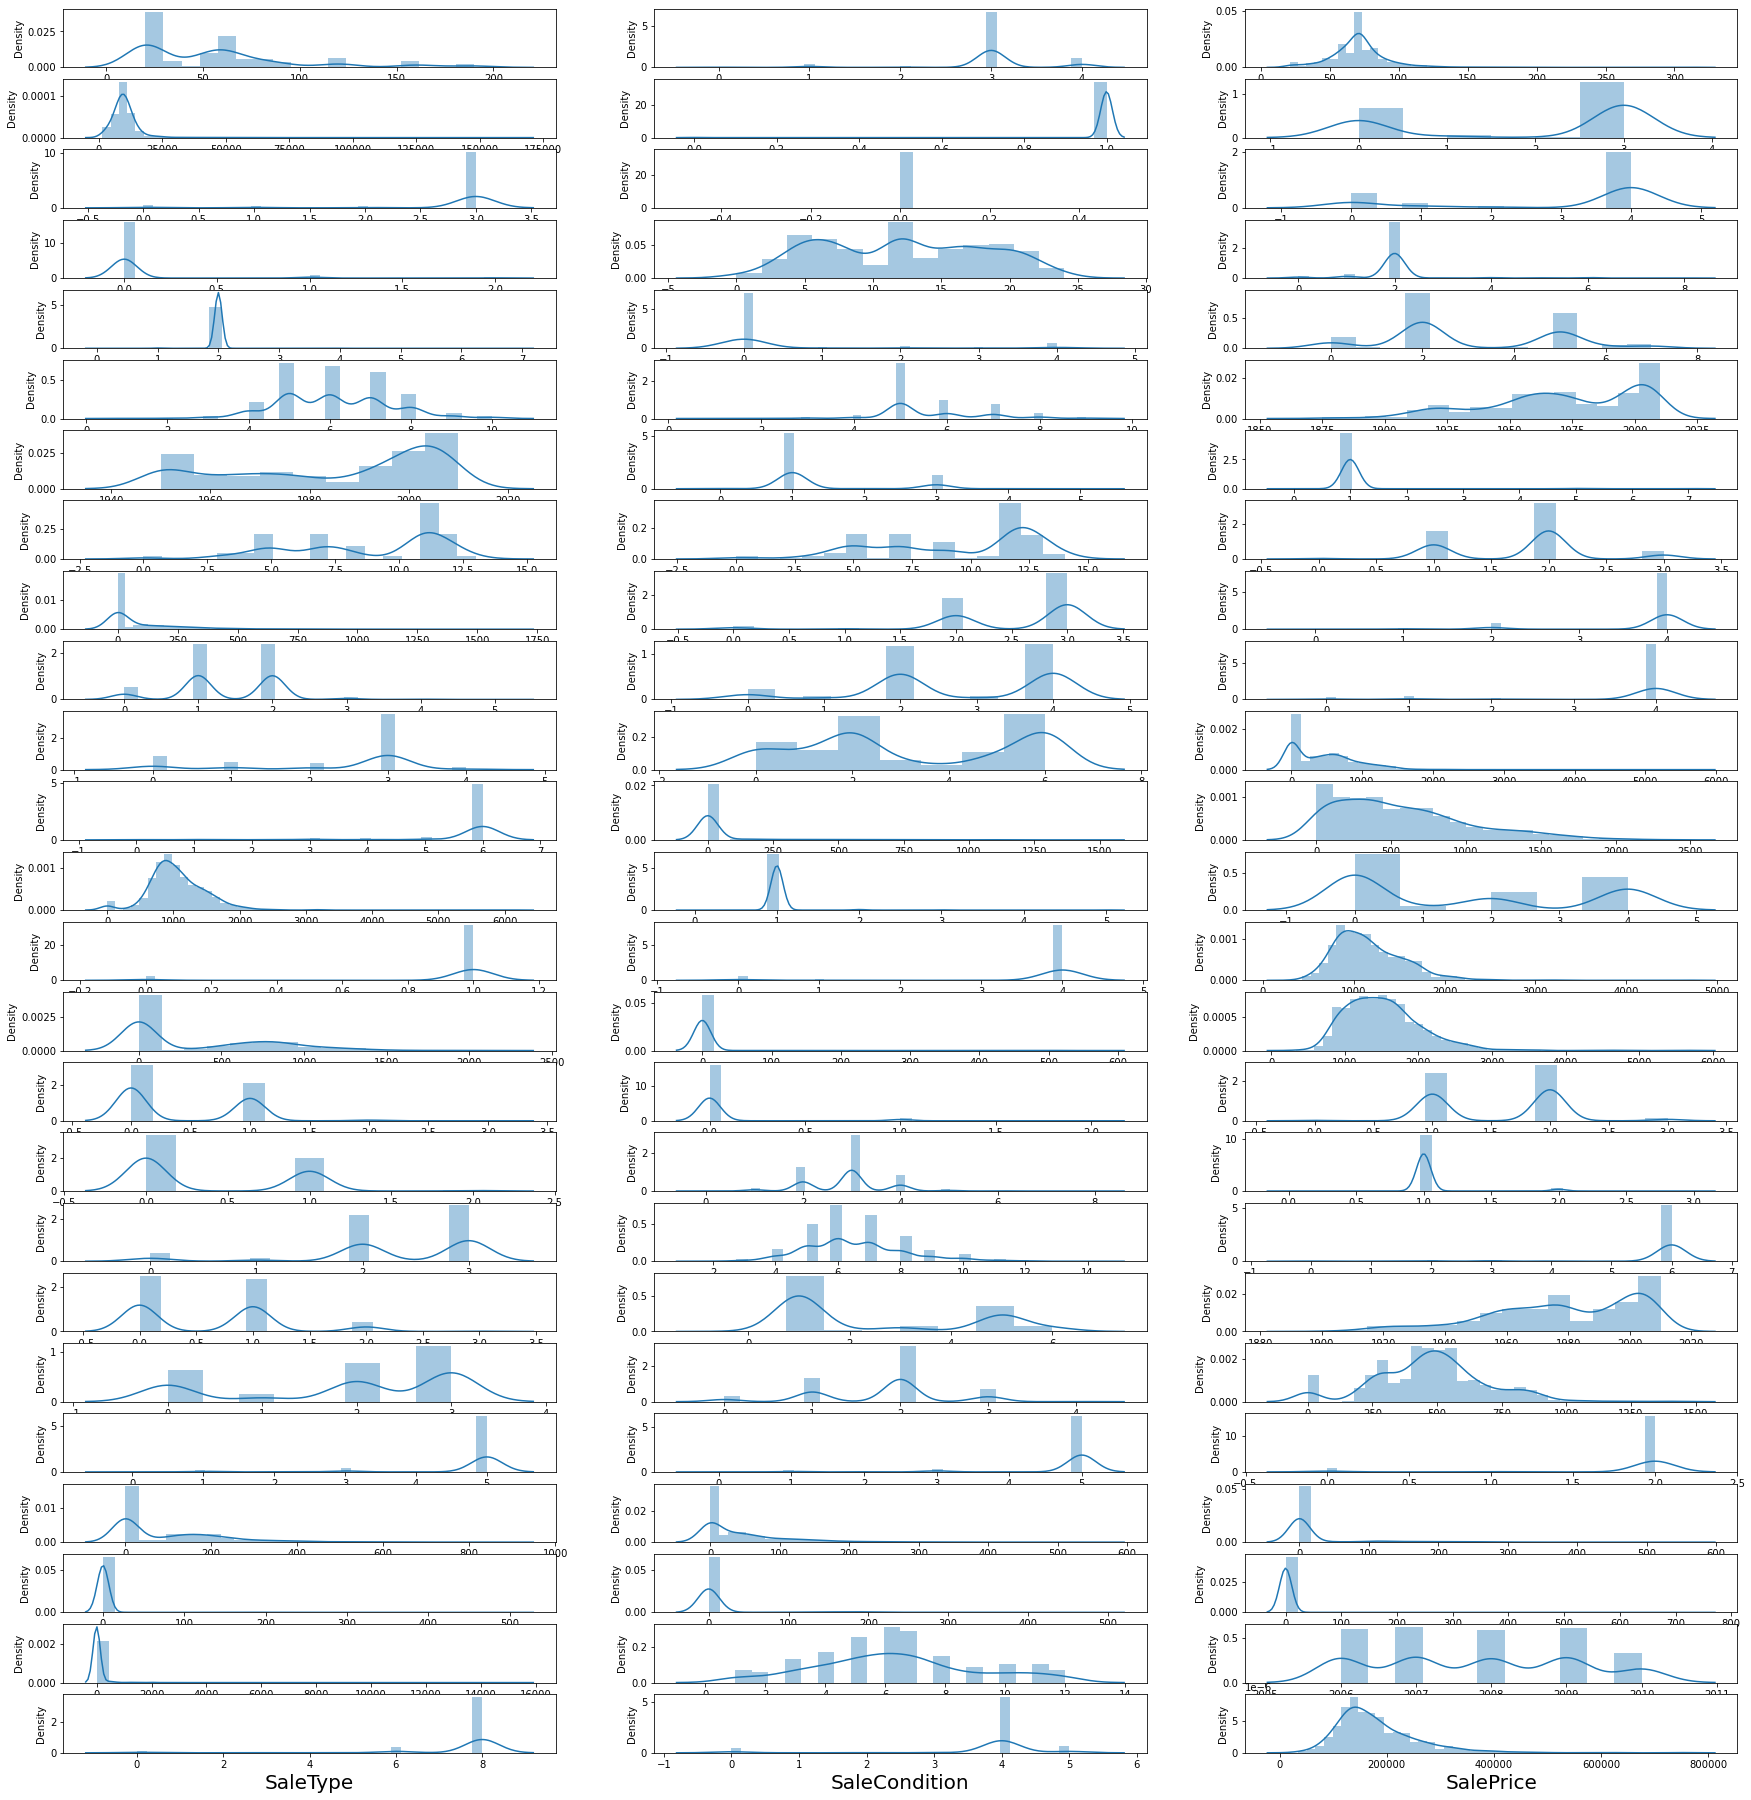

In [113]:
plt.figure(figsize=(30,45))
plotnumber = 1

for column in data:
    if plotnumber <=75:
        ax = plt.subplot(35,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

In [114]:
data.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -0.487530
BsmtCond         -2.816444
BsmtExposure     -1.075098
BsmtFinType1      0.100811
BsmtFinSF1        1.871606
BsmtFinType2     -3.144813
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

- Data have a some skewness.

## Checking Multicollinearity

In [115]:
x = data.drop(columns=['SalePrice'],axis=1)
y = data['SalePrice']

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = pd.DataFrame()

In [120]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,MSSubClass,5.007543
1,MSZoning,1.357159
2,LotFrontage,1.755825
3,LotArea,1.755646
4,Street,1.195391
5,LotShape,1.256674
6,LandContour,1.329278
7,Utilities,NaN
8,LotConfig,1.160932
9,LandSlope,1.593436


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity are exists in Utilities, , BsmtFinSF2,BsmtFinSF1,BsmtUnfSF, TotalBsmtSF	, 1stFlrSF,2ndFlrSF,LowQualFinSF,  and GrLivAre Based on ANOVA F scores.

### Droping columns whose having multicollinearity

In [121]:
data.drop(columns=['Utilities','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],axis=1,inplace=True)

In [122]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,4,3,0,6,1,4,1,4,0,0,2,0,2,1,3,5,6,1,1,1977.0,2,2,440,5,5,2,0,205,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,4,1,1,0,5,1,0,1,4,1,0,2,0,4,1,2,8,6,1,1,1970.0,3,2,621,5,5,2,81,207,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,4,0,2,6,1,0,1,4,1,0,2,1,3,1,3,8,6,1,1,1997.0,3,2,455,5,5,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,4,3,1,6,1,0,1,4,0,0,2,0,3,1,3,7,6,1,1,1977.0,2,2,546,5,5,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,4,3,0,6,1,2,1,4,0,1,2,0,3,1,2,8,6,1,1,1977.0,0,2,529,5,5,2,240,0,0,0,0,0,0,6,2009,8,4,215000


In [123]:
x = data.drop(columns=['SalePrice'],axis=1)
y = data['SalePrice']

## Selecting Kbest Features

In [124]:
from sklearn.feature_selection import SelectKBest, f_classif

In [125]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [126]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

          Feature     Score
14    OverallQual  5.303071
60        MiscVal  3.564855
24      ExterQual  3.514221
42    KitchenQual  2.617125
49     GarageCars  2.578547
38       FullBath  2.435854
27       BsmtQual  2.334113
50     GarageArea  2.316328
16      YearBuilt  2.133300
23     MasVnrArea  1.852976
4          Street  1.835751
3         LotArea  1.826320
17   YearRemodAdd  1.813783
48   GarageFinish  1.811582
47    GarageYrBlt  1.725406
32        Heating  1.707885
43   TotRmsAbvGrd  1.656866
1        MSZoning  1.640044
45     Fireplaces  1.591973
34     CentralAir  1.557680
46     GarageType  1.544438
26     Foundation  1.528516
55    OpenPorchSF  1.460290
5        LotShape  1.407526
33      HeatingQC  1.358939
39       HalfBath  1.337597
9    Neighborhood  1.281079
29   BsmtExposure  1.257329
54     WoodDeckSF  1.254936
28       BsmtCond  1.221104
19       RoofMatl  1.179426
22     MasVnrType  1.171156
40   BedroomAbvGr  1.146460
35     Electrical  1.145835
51     GarageQual  1

In [127]:
x.shape

(1168, 65)

### Selecting best features based on their scores

In [130]:
x_best = x.drop(columns=['SaleType','Condition2',]).copy()

In [136]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [137]:
x = scaler.fit_transform(x_best)

In [139]:
x

array([[ 1.50830058, -0.02164599,  0.        , ..., -1.61782184,
        -0.60548713,  0.20793187],
       [-0.87704243, -0.02164599,  1.07063136, ...,  1.3614701 ,
        -0.60548713,  0.20793187],
       [ 0.07709478, -0.02164599,  0.93686671, ..., -0.12817587,
        -0.60548713,  0.20793187],
       ...,
       [ 2.46243779, -0.02164599, -2.09513215, ...,  0.24423562,
         0.8992128 ,  0.20793187],
       [ 0.31562908, -4.76211672, -0.93583847, ...,  0.24423562,
         0.14686284,  0.20793187],
       [ 0.07709478, -0.02164599,  0.        , ..., -0.12817587,
        -1.3578371 ,  0.20793187]])

# Model Building

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##  Linear Regression

### Finding Best Random State

In [141]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8696854386964366 on Random State 135


In [142]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=135)

In [143]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [144]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,21049.16,9.239717e+08,30396.90339,0.87


### Cross - Validation of the model

In [145]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [146]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 76.95323033369756
accuracy_score is:- 87.2139667319613


At cv:- 5
Cross validation score is:- 76.3315189979477
accuracy_score is:- 87.2139667319613


At cv:- 6
Cross validation score is:- 77.21221871690848
accuracy_score is:- 87.2139667319613


At cv:- 7
Cross validation score is:- 75.726237523794
accuracy_score is:- 87.2139667319613


At cv:- 8
Cross validation score is:- 77.32514097659455
accuracy_score is:- 87.2139667319613


At cv:- 9
Cross validation score is:- 75.6272161182533
accuracy_score is:- 87.2139667319613




In [147]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.7732514097659455 
The accuracy score is:  0.8721396673196131


##  RandomForest Regressor
### Finding Best Random State

In [148]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8868070591834291 on Random State 135


In [150]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=135)

In [151]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [152]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,19674.147,7.932564e+08,28164.808191,0.888


### Cross - Validation of the model

In [153]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [154]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.51160233099495
accuracy_score is:- 88.87169946361256


At cv:- 5
Cross validation score is:- 81.15381458000097
accuracy_score is:- 88.87169946361256


At cv:- 6
Cross validation score is:- 81.78879590456685
accuracy_score is:- 88.87169946361256


At cv:- 7
Cross validation score is:- 80.75068575636949
accuracy_score is:- 88.87169946361256


At cv:- 8
Cross validation score is:- 81.70035258978716
accuracy_score is:- 88.87169946361256


At cv:- 9
Cross validation score is:- 80.77297473232082
accuracy_score is:- 88.87169946361256




In [155]:
lsscore_selected = cross_val_score(rf,x,y,cv=6).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8159460782039397 
The accuracy score is:  0.8887169946361255


## Gradient Boosting Regressor
### Finding Best Random State

In [156]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8946316733452871 on Random State 135


In [157]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=135)

In [158]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [159]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,19343.363,7.566516e+08,27507.30013,0.893


### Cross-validation of the model

In [160]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [161]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.79615011670003
accuracy_score is:- 89.26980978643795


At cv:- 5
Cross validation score is:- 81.67587269317079
accuracy_score is:- 89.26980978643795


At cv:- 6
Cross validation score is:- 81.7989606484789
accuracy_score is:- 89.26980978643795


At cv:- 7
Cross validation score is:- 80.22241734713116
accuracy_score is:- 89.26980978643795


At cv:- 8
Cross validation score is:- 82.2887351764902
accuracy_score is:- 89.26980978643795


At cv:- 9
Cross validation score is:- 81.07163196539288
accuracy_score is:- 89.26980978643795




In [162]:
lsscore_selected = cross_val_score(gbr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8275259580055516 
The accuracy score is:  0.8926980978643795


## KNeighbors Regressor
### Finding Best Random State

In [149]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7979925665605202 on Random State 88


In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=88)

In [165]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [166]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,24728.548,1.254821e+09,35423.452651,0.798


### Cross-validation of the model

In [167]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [168]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 68.74970165184517
accuracy_score is:- 79.79925665605202


At cv:- 5
Cross validation score is:- 68.44350007773714
accuracy_score is:- 79.79925665605202


At cv:- 6
Cross validation score is:- 68.81050093745115
accuracy_score is:- 79.79925665605202


At cv:- 7
Cross validation score is:- 67.54686991175045
accuracy_score is:- 79.79925665605202


At cv:- 8
Cross validation score is:- 68.93309639922909
accuracy_score is:- 79.79925665605202


At cv:- 9
Cross validation score is:- 68.96135094821571
accuracy_score is:- 79.79925665605202




In [169]:
lsscore_selected = cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6896135094821572 
The accuracy score is:  0.7979925665605202


## XGBRegressor
### Finding Best Random State

In [170]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8781513506055637 on Random State 248


In [171]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=248)

In [172]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [173]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,19071.368,7.928610e+08,28157.787913,0.878


### Cross-validation of the model

In [174]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [175]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 79.58022840101758
accuracy_score is:- 87.81513506055637


At cv:- 5
Cross validation score is:- 80.0349543348284
accuracy_score is:- 87.81513506055637


At cv:- 6
Cross validation score is:- 80.21661569357038
accuracy_score is:- 87.81513506055637


At cv:- 7
Cross validation score is:- 79.59236402424216
accuracy_score is:- 87.81513506055637


At cv:- 8
Cross validation score is:- 78.61862485263767
accuracy_score is:- 87.81513506055637


At cv:- 9
Cross validation score is:- 81.53907083689376
accuracy_score is:- 87.81513506055637




In [176]:
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8153907083689376 
The accuracy score is:  0.8781513506055637


## Regularization

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [178]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 10, 'random_state': 0}

In [179]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

81.57014236088625

In [180]:
pred = r2_score(y_test,pred_ls)
pred*100

79.96281560503131

In [181]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

76.99018112764352

## Selection of Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It has least difference between accuracy score and cross validation score. 

## Hyperparameter tuning

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [186]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=135)

In [187]:
rf = RandomForestRegressor()

In [188]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [189]:
grd = GridSearchCV(rf,param_grid=parameters)

In [190]:
grd.fit(X_train,y_train)

grd.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [295]:
rf = RandomForestRegressor(min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=25, criterion='mse')

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

0.8923695356137124


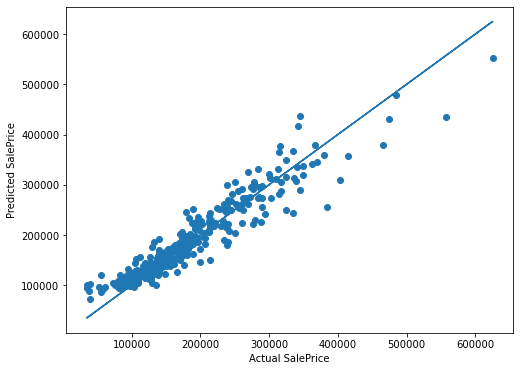

In [296]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

## Model Save

In [297]:
import joblib
joblib.dump(rf,"house_price_prediction.pkl")

['house_price_prediction.pkl']

### Loading The Model

In [299]:
mod=joblib.load("house_price_prediction.pkl")

## Prediction House Price Using Test Datasets

In [300]:
test = pd.read_csv('E://test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [307]:
test.shape

(292, 74)

In [301]:
test.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence','Id'],inplace=True)

### Filling Null values of test dataset

In [302]:
test['LotFrontage']= test['LotFrontage'].fillna(test['LotFrontage'].mean())

test['MasVnrArea']= test['MasVnrArea'].fillna(test['MasVnrArea'].mean())

test['GarageYrBlt']= test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())


In [303]:
null_columns =['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
for i in null_columns:
    test.fillna(test[i].mode()[0], inplace=True)

### Encoding Test dataset

In [304]:
from sklearn.preprocessing import LabelEncoder

In [305]:
le=LabelEncoder()

In [308]:
test.drop(columns=['Utilities','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],axis=1,inplace=True)

In [309]:
for col in data[test.columns[test.dtypes == 'object']]:
    test[col] = le.fit_transform(test[col])

In [310]:
x_best = test.drop(columns=['SaleType','Condition2',]).copy()

In [311]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [312]:
x = scaler.fit_transform(x_best)

In [313]:
print(mod.predict(x))

[345389.76 248879.4  244240.28 192829.35 204121.4   94568.16 142821.08
 323740.84 234132.16 180091.54 104211.9  149221.2  134270.   166900.15
 311552.05 117117.61 128407.5  132008.38 178616.66 189819.22 164272.9
 157174.88 149374.6  105230.22 100936.95 129472.06 176822.18 141458.9
 189710.7  105108.34 152159.6  215146.06 205870.05 161820.5  123484.1
 184599.61 186423.72 120756.8  158340.28 148959.31 114093.26 313108.22
 197501.76 196714.53 141482.56 127577.66 129000.58 113505.46 211368.87
 355434.07 130083.24 185872.42 103548.16 100301.   253657.61 125822.67
 138454.54 186094.75 130205.41 267411.83 111452.96 179673.2  125206.66
 151096.4  196851.35 115087.77 156551.66 211548.4  140140.05 150275.
 260406.93 175293.7  170289.94 133026.24 146608.88 219901.19 309598.2
 204710.   291434.9  152209.   246090.65 130508.09 136584.96 147294.41
 184440.82 253992.51 120752.97 319882.75 149109.87 180092.18 232618.3
 139478.75 134626.92 135611.59 195691.   172449.28 223642.3  180341.9
 340139.79 129

In [315]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y[0:292]})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,345389.76,128000
1,248879.40,268000
2,244240.28,269790
3,192829.35,190000
4,204121.40,215000
5,94568.16,219210
6,142821.08,121500
7,323740.84,155000
8,234132.16,140000
9,180091.54,118500
